In [10]:
# importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd

# Criação do modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Avaliação de métricas
from sklearn.metrics import accuracy_score

df = pd.read_excel('dataset_processo_seletivo.xlsx', engine='openpyxl')

# Verifique quais linhas possuem valores NaN
linhas_com_nan = df.isna().any(axis=1)

# Exiba as linhas que contêm NaN
print(df[linhas_com_nan])


          data  abcr_leves      ici       pim      receita  ic_br_energia  \
162 2023-07-01         NaN  95.5602  108.6378  214314.8836        99.0141   
163 2023-08-01         NaN  96.8202  110.4535  182332.4762       100.8889   
164 2023-09-01         NaN  96.8910  107.0321  182670.1938       102.8967   
165 2023-10-01         NaN  95.5534  108.9625  219603.7128       105.0435   
166 2023-11-01         NaN  93.3703  102.1935  193832.3845       106.7267   
..         ...         ...      ...       ...          ...            ...   
247 2030-08-01         NaN  99.7660  129.5894  265751.4766       107.6456   
248 2030-09-01         NaN  99.6894  125.5752  263341.1604       107.6456   
249 2030-10-01         NaN  98.1659  127.8401  299714.2207       107.6456   
250 2030-11-01         NaN  95.7795  119.8983  278763.6039       107.6456   
251 2030-12-01         NaN  92.6733  106.9776  329016.8818       107.6456   

     preco_diesel  preco_etanol  reservas_internacionais  \
162        1.32

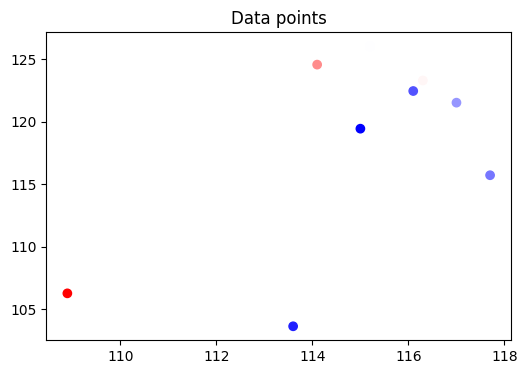

In [13]:
# Carregue seu arquivo Excel 
df = pd.read_excel('dataset_processo_seletivo.xlsx', engine='openpyxl')

# Criadno Dataset
x = np.array([[108.9,106.28638,74495.82999,47.1256,1.1386,1.0918,240484,88.91831,96.27988,91.24382,78.42115,8.75,107.30917,106.14632,106.55851,100.85119], 
              [113.6,103.65597,55082.06465,46.6218,1.1315,1.1138,241082,73.95911,90.50721,82.44177,76.00021,8.75,107.1822,103.88948,101.59579,102.65056], 
              [116.1,122.44795,60875.89008,42.7258,1.124,1.0053,243762,83.79243,102.25872,98.80615,83.95472,8.75,128.35996,123.12642,117.38226,129.42121],
              [117.7,115.72172,72460.79977,42.8074,1.117,0.9237,247292,76.36513,97.31072,108.72395,79.97747,9.5,118.1051,116.11801,113.71574,117.78302], 
              [117,121.51816,62635.27196,43.6927,1.11,0.8723,249846,87.97682,102.3618,125.83217,80.84209,9.5,122.90152,122.0084,119.86104,124.18815],
              [115,119.43995,62991.84849,45.5667,1.11,0.8328,253114,80.02648,98.23847,120.37737,79.11285,10.25,119.14995,119.89844,119.277,119.96295], 
              [114.1,124.55664,69612.61085,44.4378,1.1099,0.8474,257299,82.32789,103.08339,119.01368,83.00364,10.75,124.65266,124.91462,124.66061,122.5267], 
              [115.2,126.02153,64362.01645,43.466,1.1083,0.8741,261320,87.03533,104.32039,113.9308,82.65779,10.75,130.34365,126.45538,122.75059,128.36599], 
              [116.3,123.28957,65087.94566,41.0438,1.1022,0.8797,275206,86.82611,104.42347,106.86436,81.53378,10.75,130.33916,123.5968,118.39081,125.57206]
             ])

d = np.array([137.5576539,118.3808207,120.3708055,121.7957809,123.1266078,117.056804,131.8897855,127.2304267,127.6569598])

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [14]:
#CRIANDO A CLASSE DA REDE PERCEPTRON
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        # Construtor, define taxa de aprendizado e número máximo de épocas
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        # 1 se value > 0, -1 se value < 0, 0 se value == 0 
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        # Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        # Calcula a diferença entre o valor real e o valor predito
        return (target - predicted)
    
    def train(self, x, d):
        # Definir aleatoriamente os pesos, o bias e o peso do bias
        # Enquanto houver erro, ou o máximo de épocas não for atingido continua o processo
            
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            
            is_error  = False
            epoch_errors = 0
            
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += current_error
                
                # Se houve erro, atualizar os pesos
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors/len(x))
            epoch += 1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [15]:
# Instanciando e treinando a rede
p = Perceptron(lr = 0.1, n_epochs = 100)
p.train(x = x, d = d)

In [16]:
x_teste = np.array([[114.9,125.54517,76073.76274,40.8524,1.0962,0.9329,284930,92.26582,106.58822,116.03833,86.11628,10.75,134.83667,126.14076,119.68562,125.80445],
                    [110.4,124.42525,69599.81096,44.0036,1.0872,0.9517,285461,99.90233,103.28955,120.62532,81.62025,10.75,133.81529,125.07774,116.93916,133.20042], 
                    [107.8,112.54306,93241.10649,46.199,1.0804,0.9771,288575,137.45724,109.37147,232.57256,104.27332,10.75,117.47591,112.22498,108.3047,118.59697],])
teste_resultado = p.test(x_teste)
teste_resultado

[1, 1, 1]

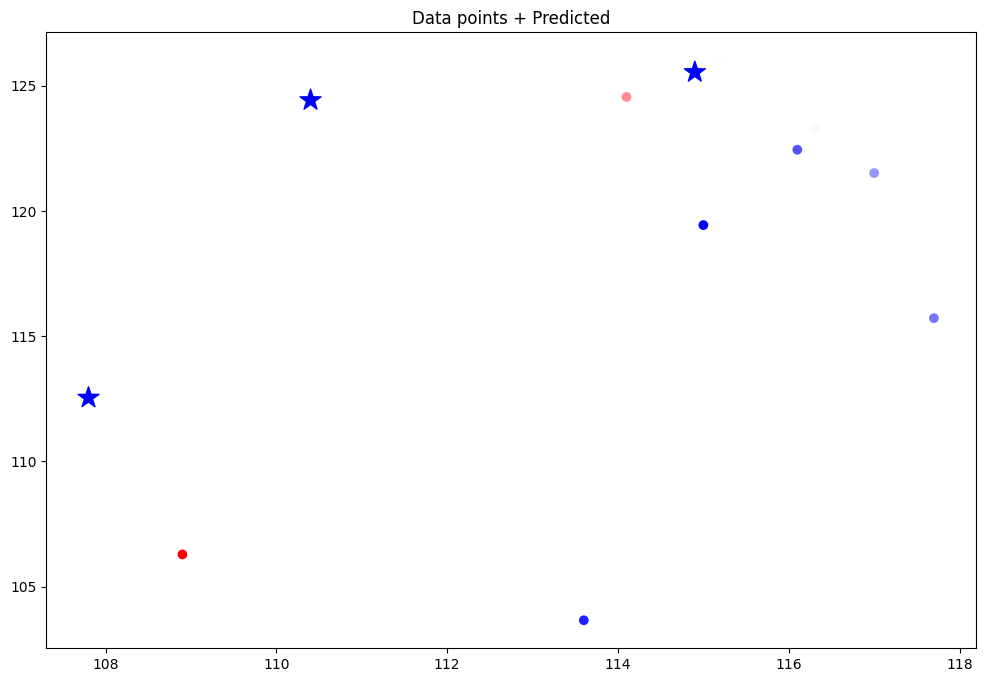

In [17]:
# Mostrando valores preditos
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

In [2]:
# Carregue seu arquivo Excel 
df = pd.read_excel('dataset_processo_seletivo.xlsx', engine='openpyxl')

# Calcule as estatísticas descritivas para 'abcr_leves'
desc_stats = df['abcr_leves'].describe()

# Extraia os valores específicos que você deseja (média, mediana, desvio padrão, mínimo e máximo)
media = desc_stats['mean']
mediana = desc_stats['50%']  # '50%' é o valor da mediana
desvio_padrao = desc_stats['std']
minimo = desc_stats['min']
maximo = desc_stats['max']

# Imprima as estatísticas descritivas
print("Média:", media)
print("Mediana:", mediana)
print("Desvio Padrão:", desvio_padrao)
print("Mínimo:", minimo)
print("Máximo:", maximo)


Média: 147.5616157476191
Mediana: 149.38376508550903
Desvio Padrão: 16.722341913990558
Mínimo: 72.4875295830798
Máximo: 182.15801275575


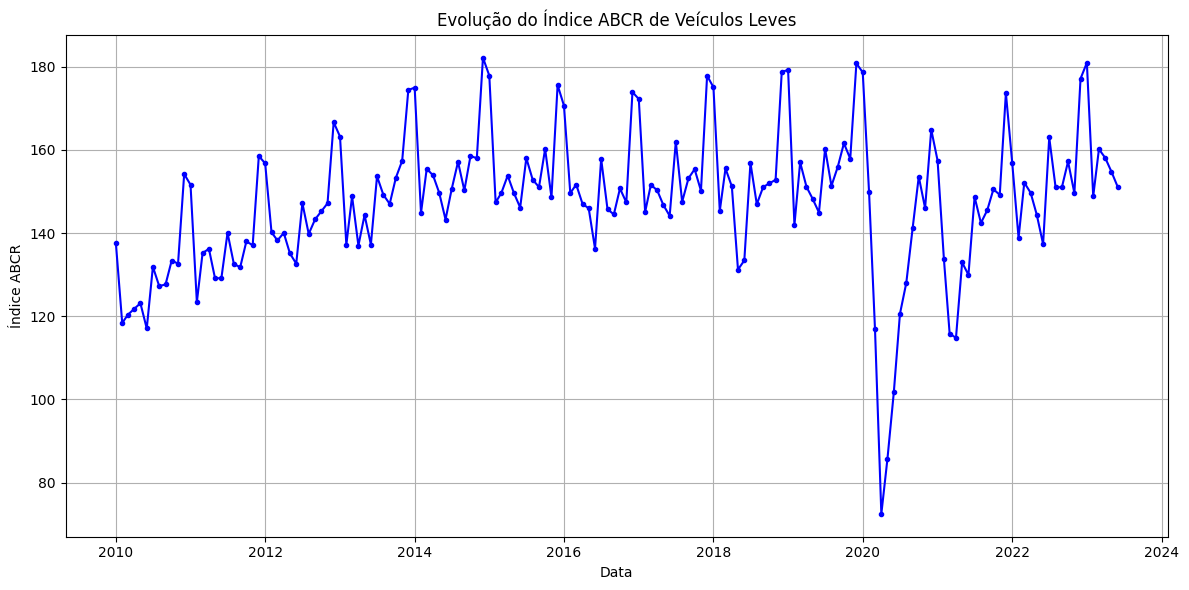

In [3]:
plt.figure(figsize=(12, 6))  # Tamanho da figura
plt.plot(df['data'], df['abcr_leves'], marker='.', linestyle='-', color='b')
plt.title('Evolução do Índice ABCR de Veículos Leves')
plt.xlabel('Data')
plt.ylabel('Índice ABCR')
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

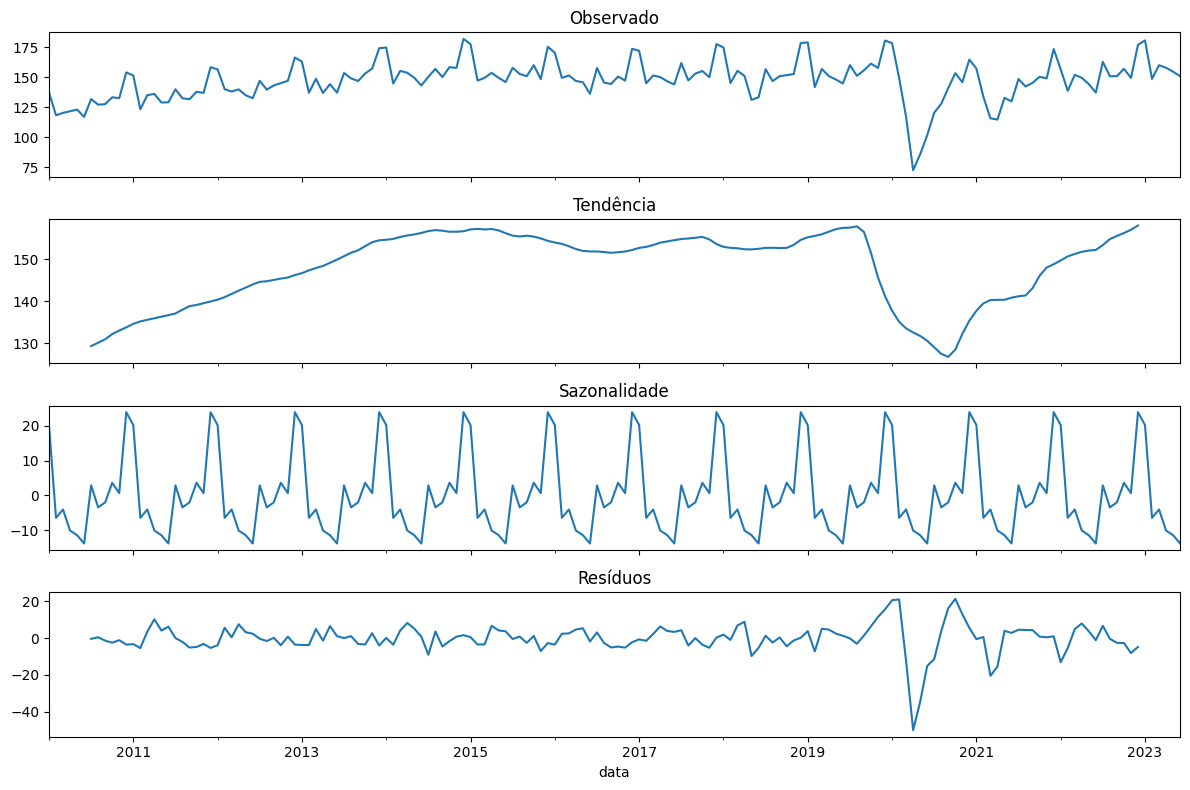

In [8]:
# Defina a coluna de datas como índice do DataFrame
#df.set_index('data', inplace=True)

df.dropna(subset=['abcr_leves'], inplace=True)

# Decomponha a série temporal
decomposition = sm.tsa.seasonal_decompose(df['abcr_leves'], model='additive')

# Plote a decomposição
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposition.observed.plot(ax=axes[0], title='Observado')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Resíduos')

plt.tight_layout()
plt.show()


MAE: 13.34147624355572
MSE: 268.50551624753234
RMSE: 16.38613792958952
MAPE: 8.808940741259018%
            abcr_leves
2023-06-02         NaN
2023-06-03         NaN
2023-06-04         NaN
2023-06-05         NaN
2023-06-06         NaN
...                ...
2023-10-19         NaN
2023-10-20         NaN
2023-10-21         NaN
2023-10-22         NaN
2023-10-23         NaN

[144 rows x 1 columns]


C:\Users\sarah\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sarah\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sarah\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\sarah\AppData\Local\Temp\ipykernel_15956\2164996561.py:35: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_index = pd.date_range(start=test_data.index[-1], periods=n_steps + 1, closed='right')


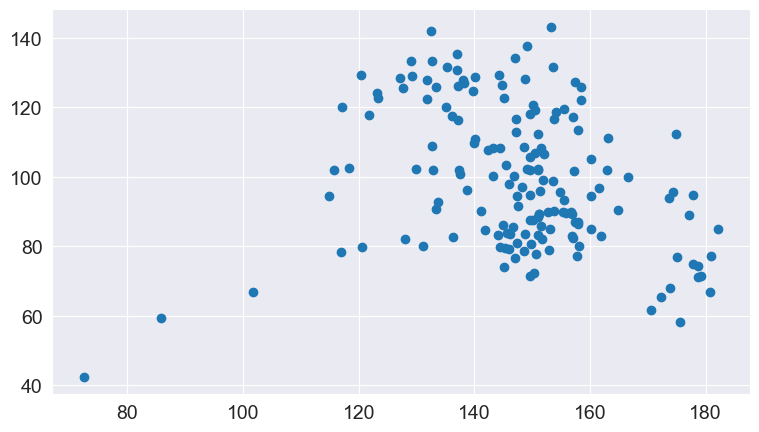

In [108]:
plt.scatter(base["abcr_leves"], base["pim_bens_capital"])
plt.show()

,data,abcr_leves,ici,pim,receita,ic_br_energia,preco_diesel,preco_etanol,reservas_internacionais,pmc_moveis_linha_branca,pmc_combustiveis_lubrificantes,pmc_roupa_calcados,pmc_alimentos_bebidas,selic_meta,pim_bens_consumo,pim_manufatura,pim_bens_intermediarios,pim_bens_capital
0,2010-01-01,137.557654,108.9,106.28638,74495.829991,47.1256,1.1386,1.0918,240484.0,88.91831,96.27988,91.24382,78.42115,8.75,107.30917,106.14632,106.55851,100.85119
1,2010-02-01,118.380821,113.6,103.65597,55082.064653,46.6218,1.1315,1.1138,241082.0,73.95911,90.50721,82.44177,76.00021,8.75,107.18220,103.88948,101.59579,102.65056
2,2010-03-01,120.370806,116.1,122.44795,60875.890076,42.7258,1.1240,1.0053,243762.0,83.79243,102.25872,98.80615,83.95472,8.75,128.35996,123.12642,117.38226,129.42121
3,2010-04-01,121.795781,117.7,115.72172,72460.799766,42.8074,1.1170,0.9237,247292.0,76.36513,97.31072,108.72395,79.97747,9.50,118.10510,116.11801,113.71574,117.78302
4,2010-05-01,123.126608,117.0,121.51816,62635.271956,43.6927,1.1100,0.8723,249846.0,87.97682,102.36180,125.83217,80.84209,9.50,122.90152,122.00840,119.86104,124.18815


In [31]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

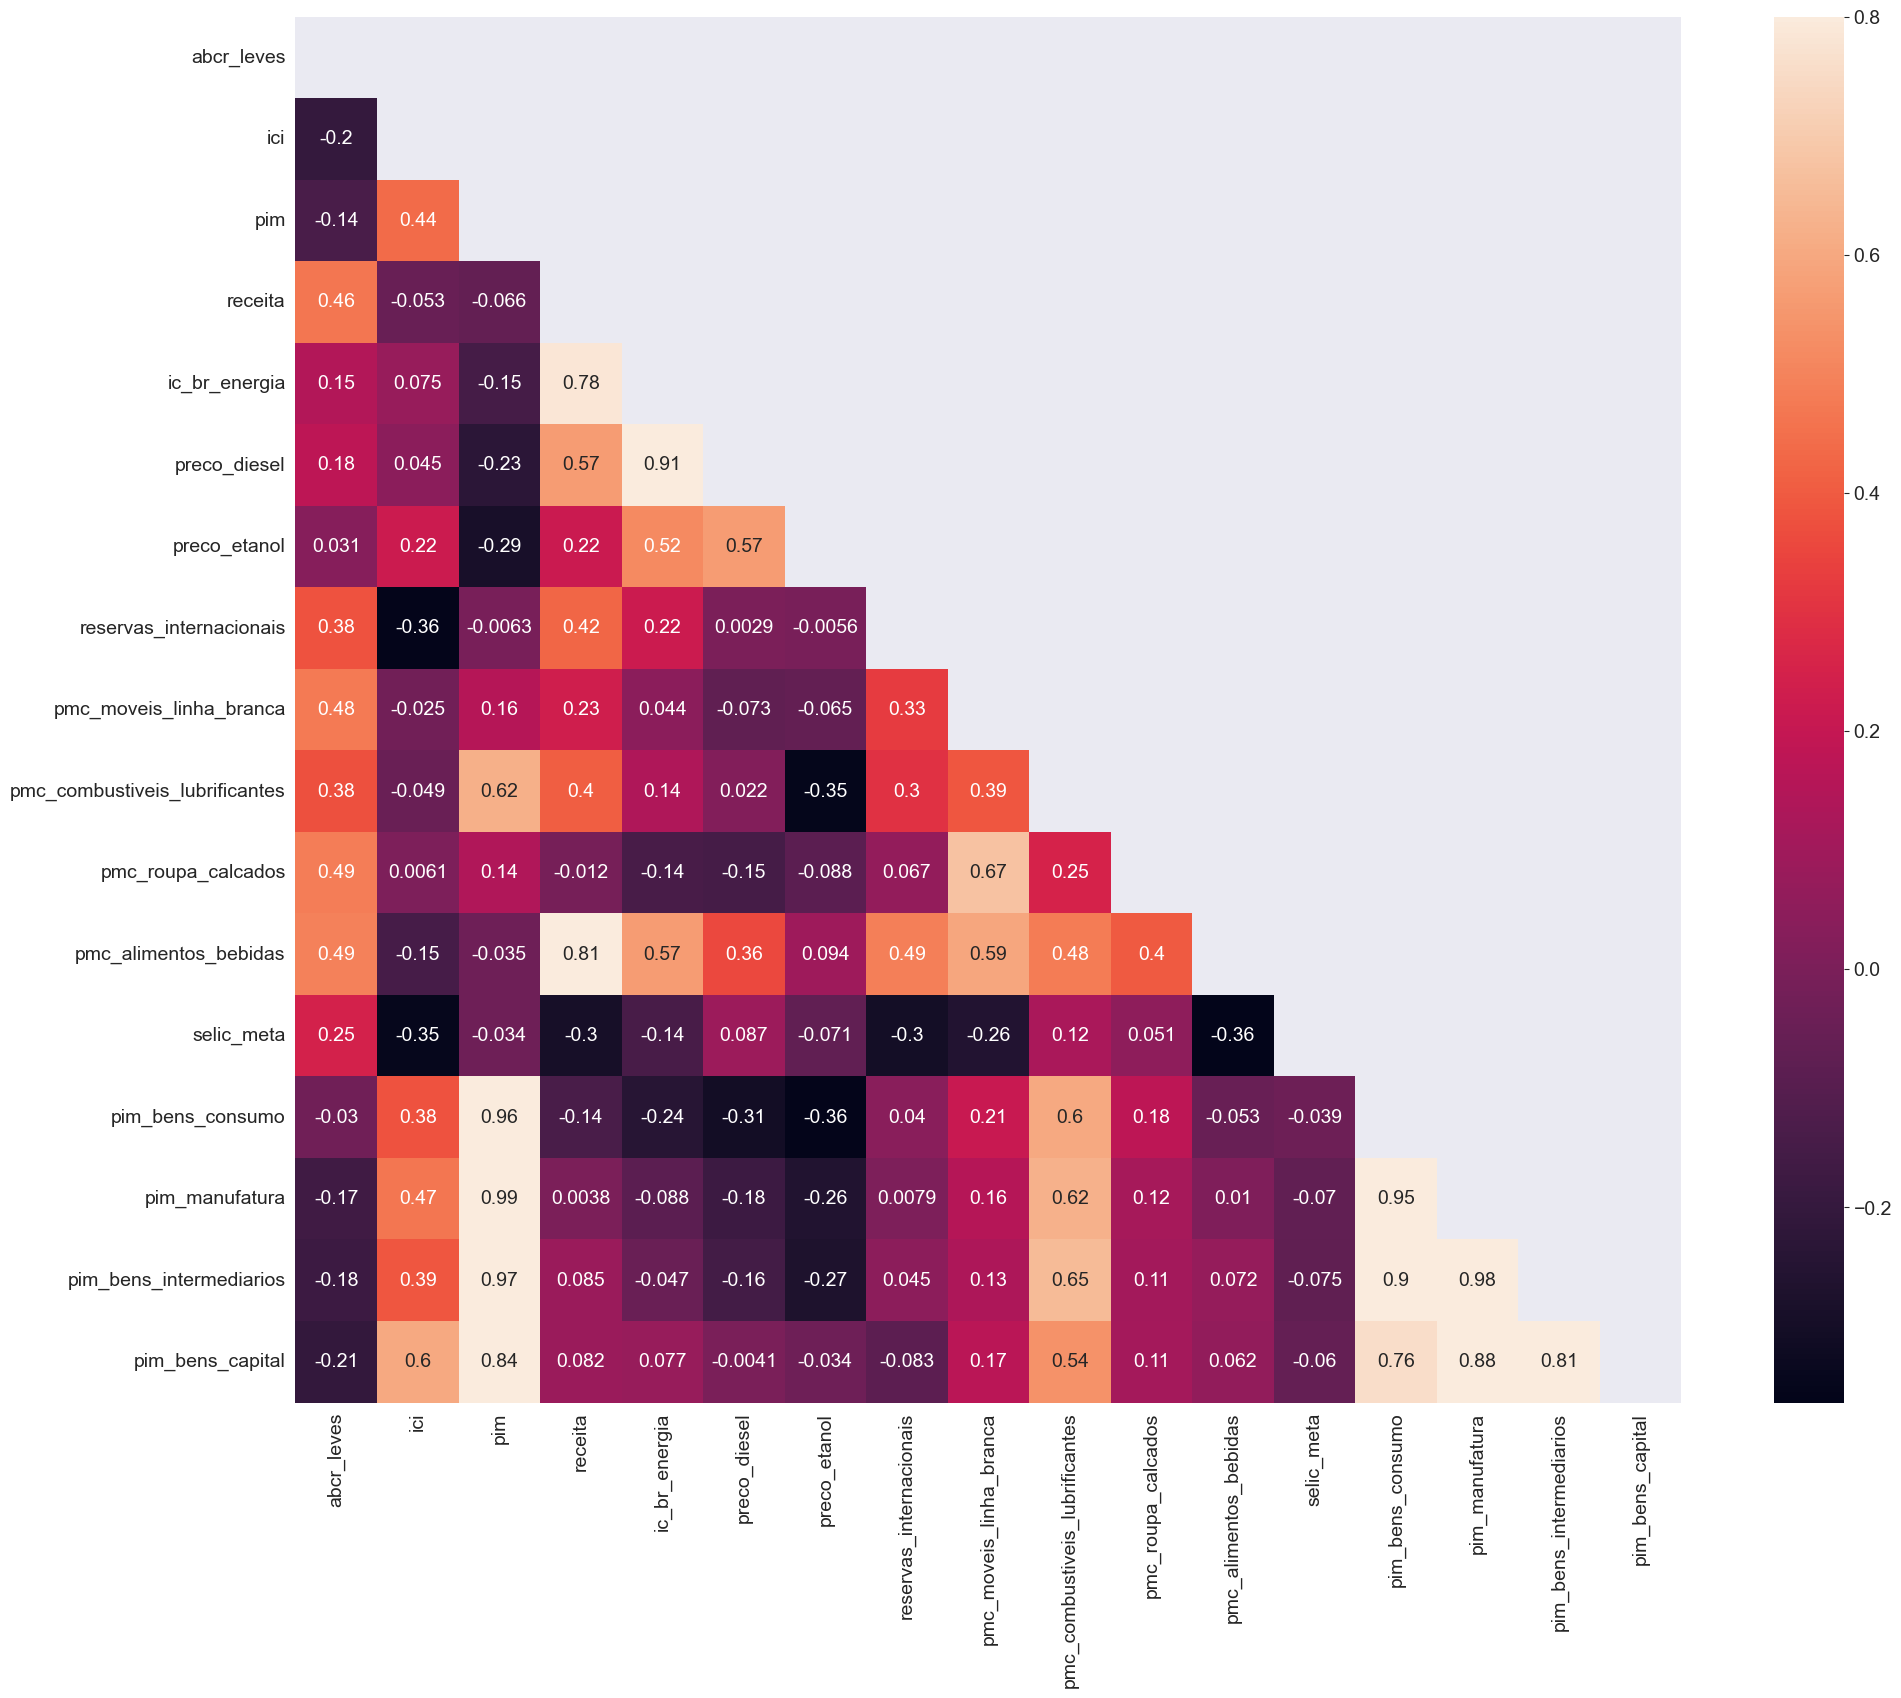

In [44]:
#raw-materials list
raw_data=['abcr_leves', 'ici', 'pim', 'receita', 'ic_br_energia', 'preco_diesel', 'preco_etanol', 'reservas_internacionais', 'pmc_moveis_linha_branca', 'pmc_combustiveis_lubrificantes', 'pmc_roupa_calcados', 'pmc_alimentos_bebidas', 'selic_meta', 'pim_bens_consumo', 'pim_manufatura', 'pim_bens_intermediarios' , 'pim_bens_capital']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (24, 18))
#masking the upper traingle part since matrix is symmetric(repetitive) 
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

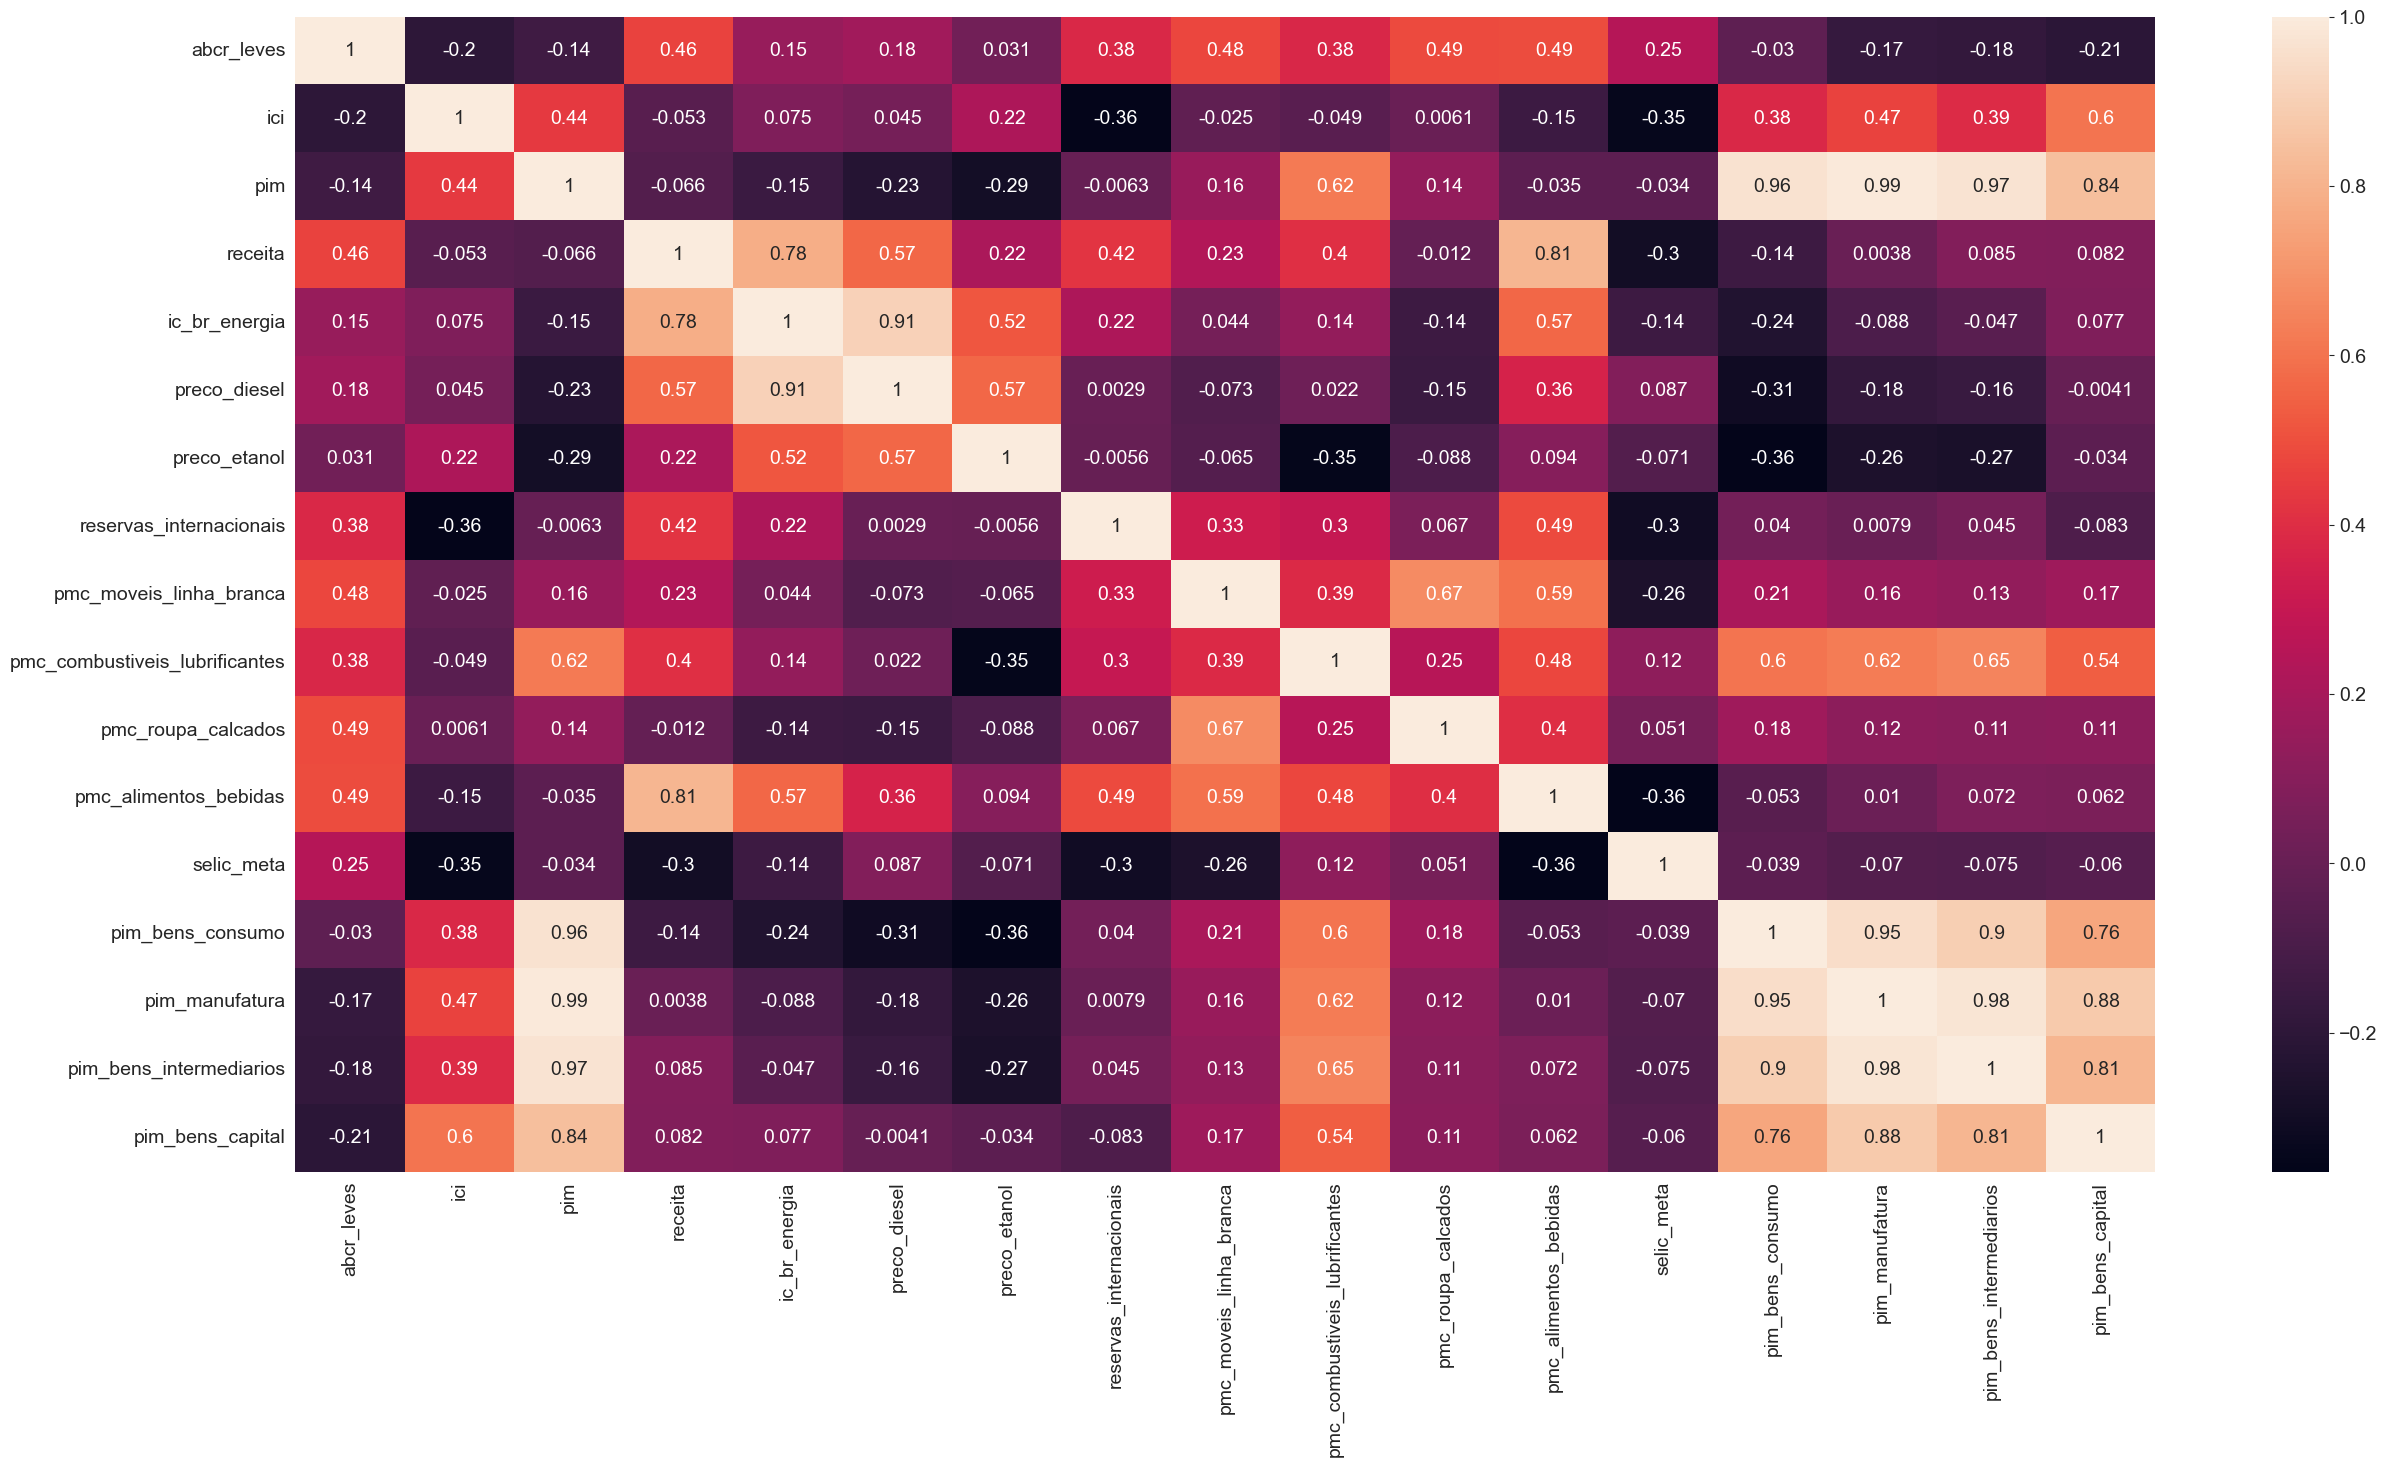

In [47]:
plt.figure(figsize=(30,15))
changelist=['abcr_leves', 'ici', 'pim', 'receita', 'ic_br_energia', 'preco_diesel', 'preco_etanol', 'reservas_internacionais', 'pmc_moveis_linha_branca', 'pmc_combustiveis_lubrificantes', 'pmc_roupa_calcados', 'pmc_alimentos_bebidas', 'selic_meta', 'pim_bens_consumo', 'pim_manufatura', 'pim_bens_intermediarios' , 'pim_bens_capital']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

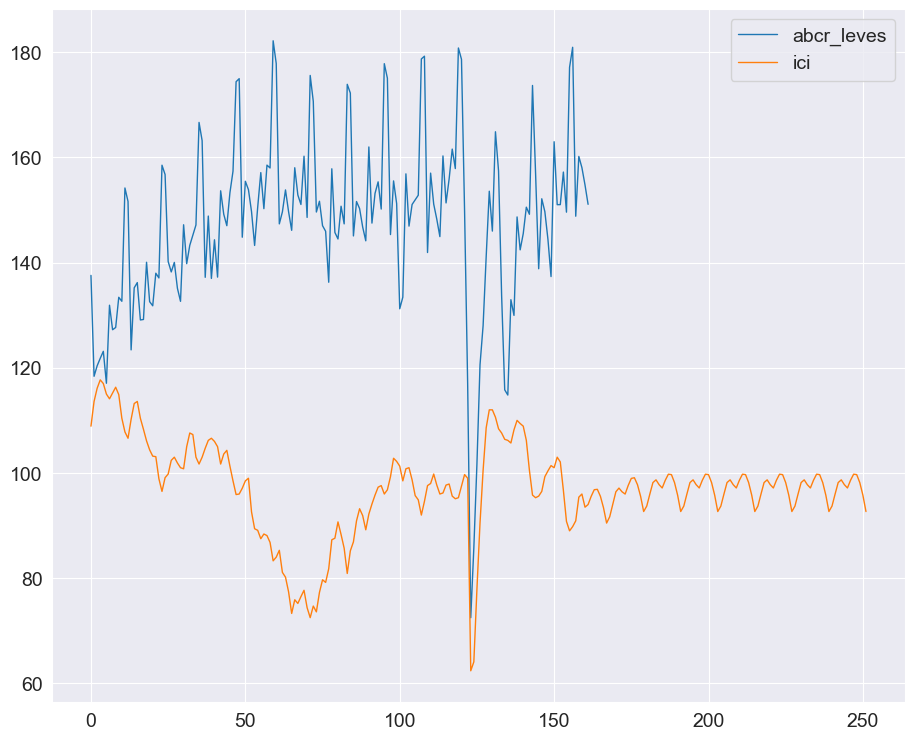

In [80]:
axes=df[["abcr_leves", "ici"]].plot(figsize=(11, 9), subplots=False, linewidth=1)

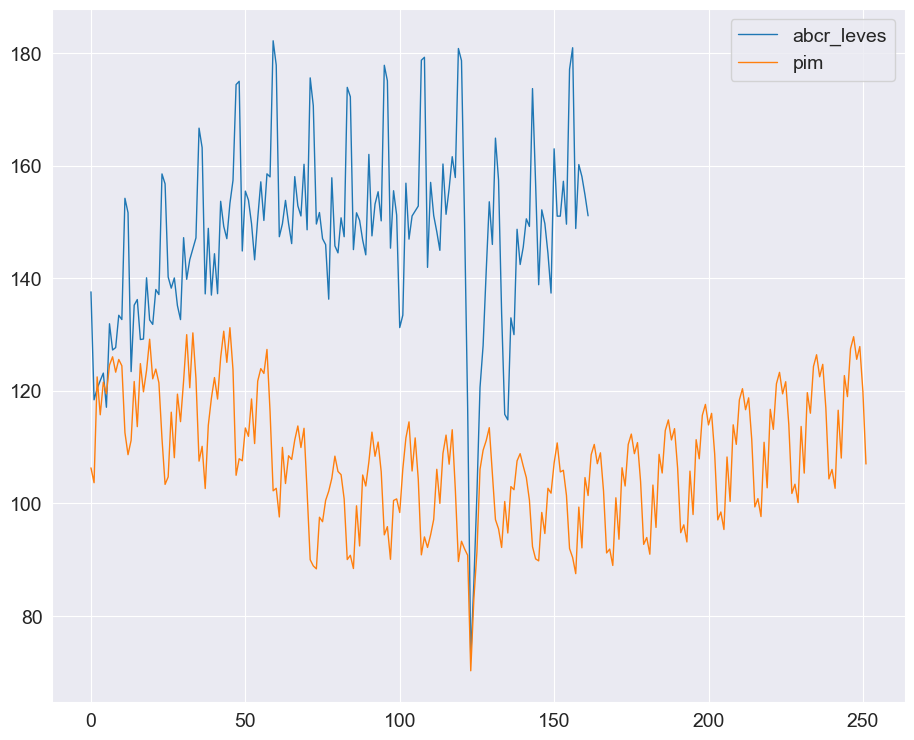

In [81]:
axes=df[["abcr_leves", "pim"]].plot(figsize=(11, 9), subplots=False, linewidth=1)

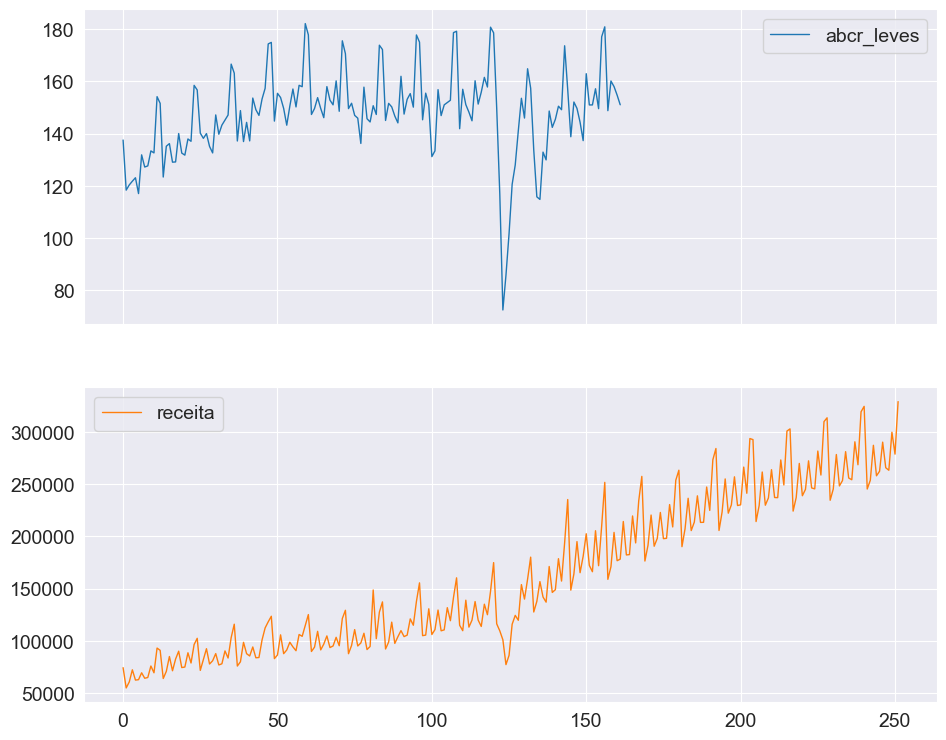

In [83]:
axes=df[["abcr_leves", "receita"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

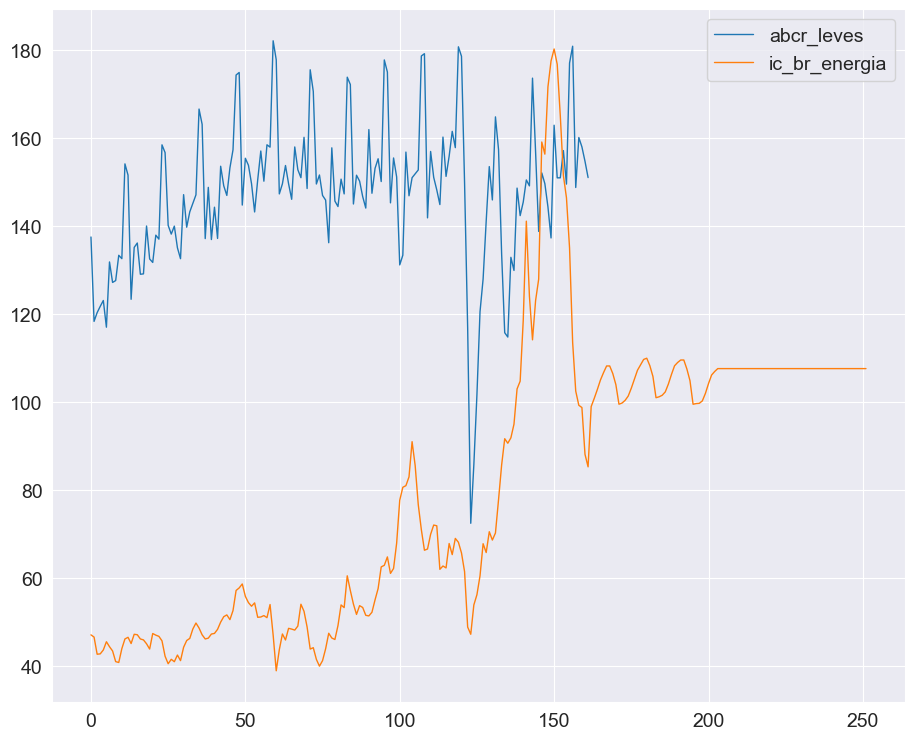

In [84]:
axes=df[["abcr_leves", "ic_br_energia"]].plot(figsize=(11, 9), subplots=False, linewidth=1)

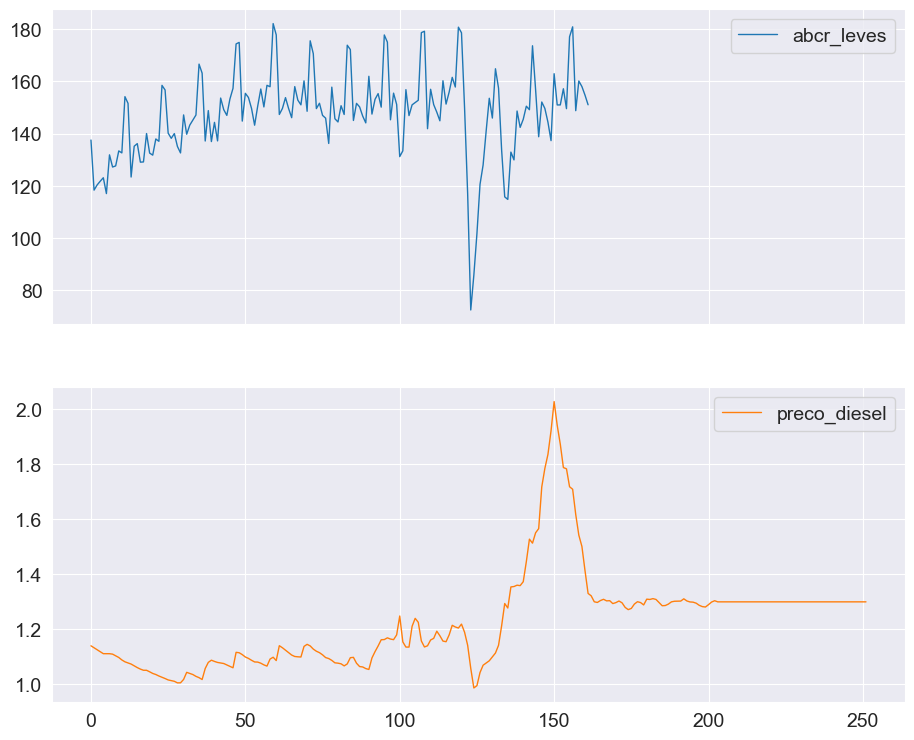

In [86]:
axes=df[["abcr_leves", "preco_diesel"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

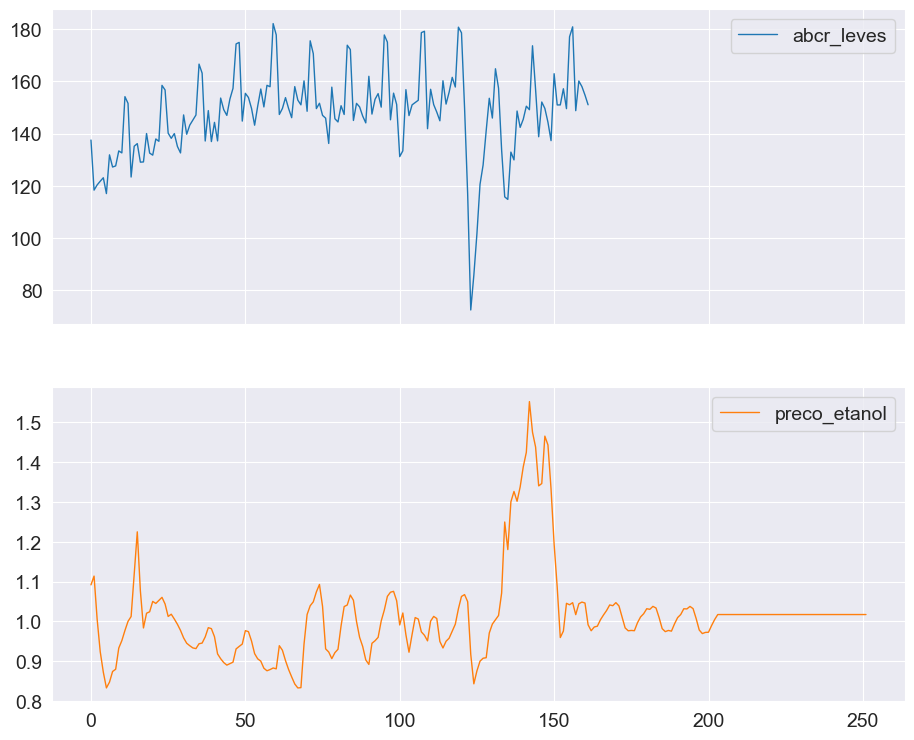

In [69]:
axes=df[["abcr_leves", "preco_etanol"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

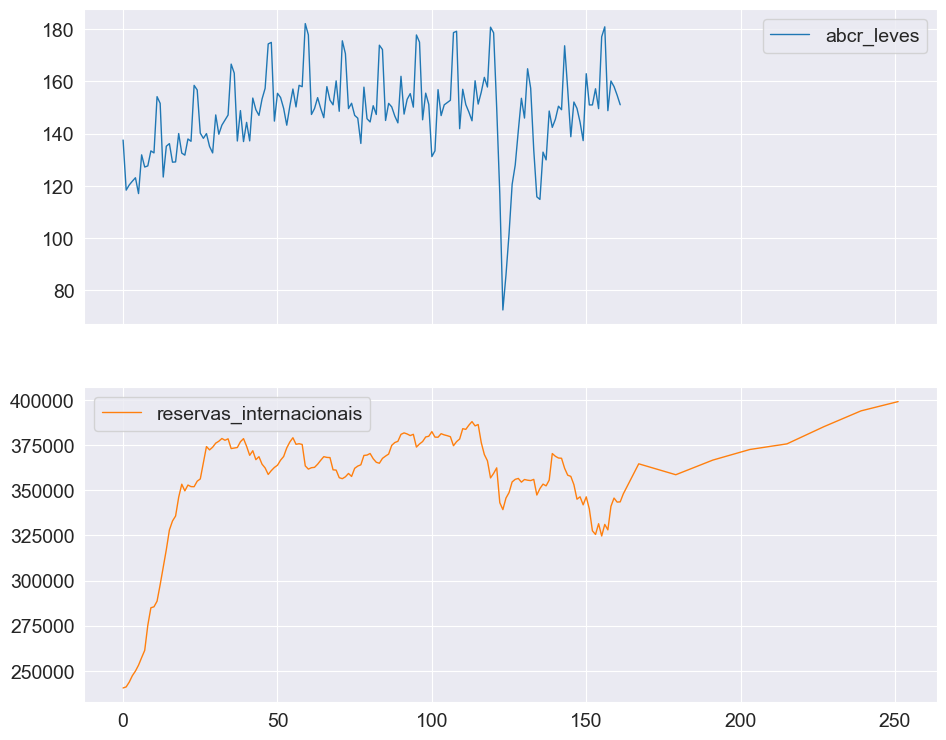

In [70]:
axes=df[["abcr_leves", "reservas_internacionais"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

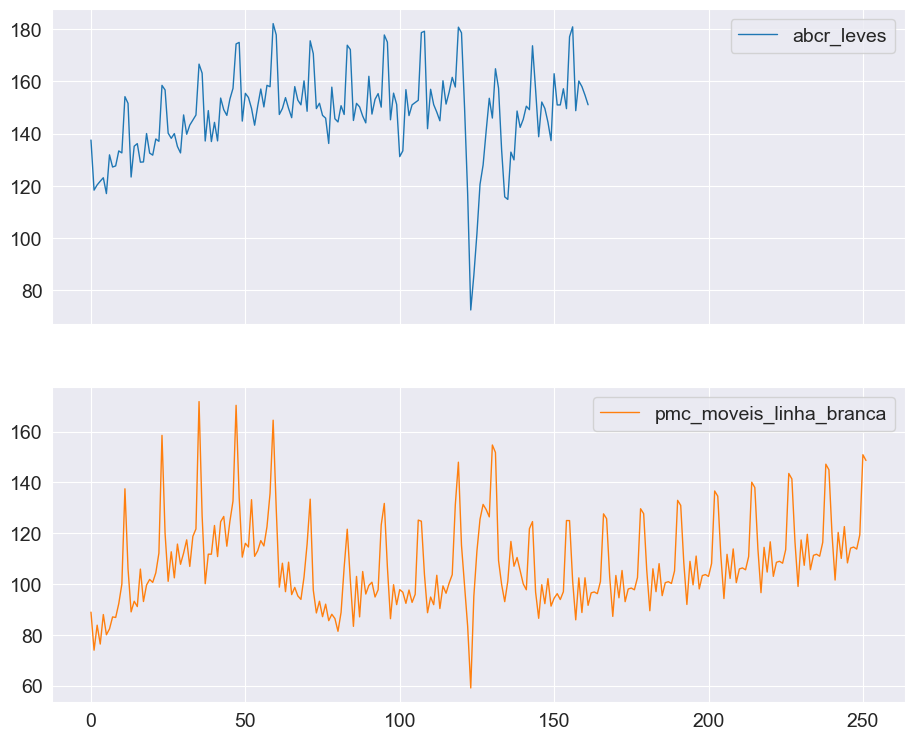

In [71]:
axes=df[["abcr_leves", "pmc_moveis_linha_branca"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

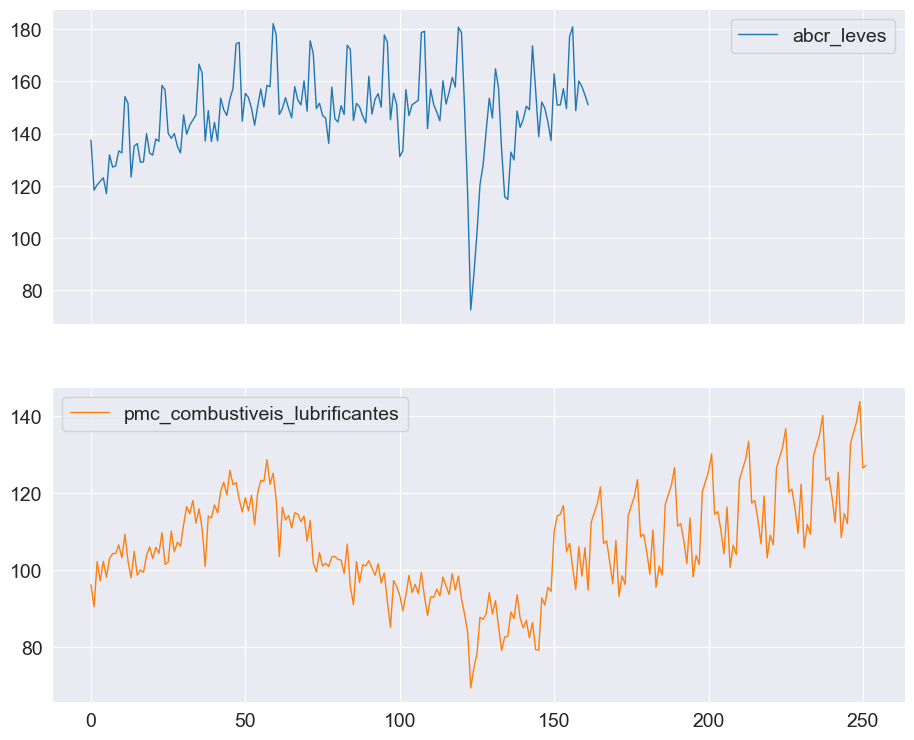

In [72]:
axes=df[["abcr_leves", "pmc_combustiveis_lubrificantes"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

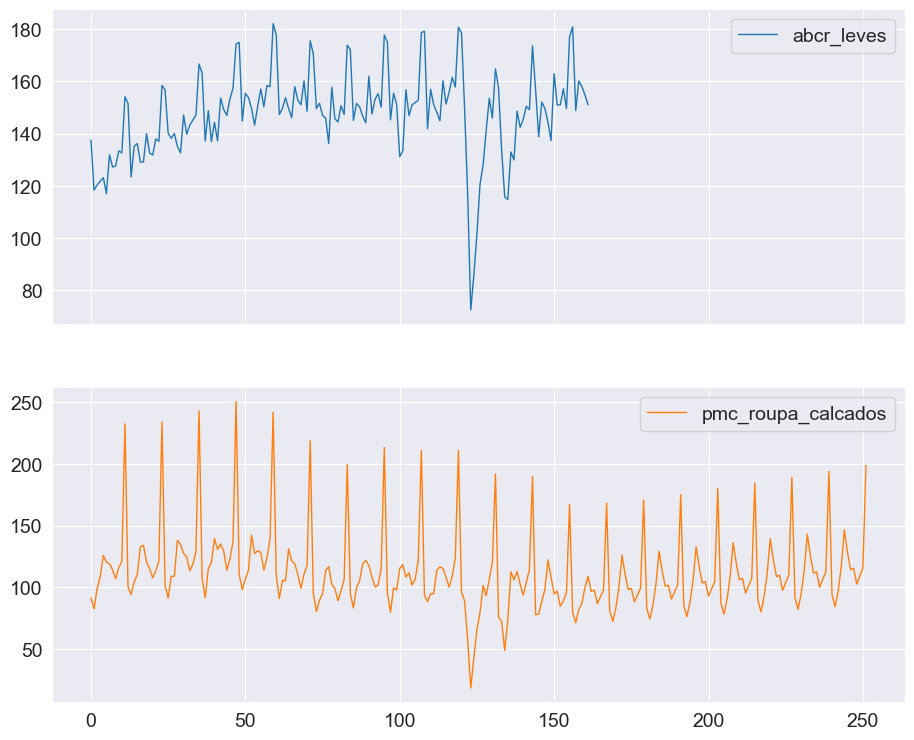

In [73]:
axes=df[["abcr_leves", "pmc_roupa_calcados"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

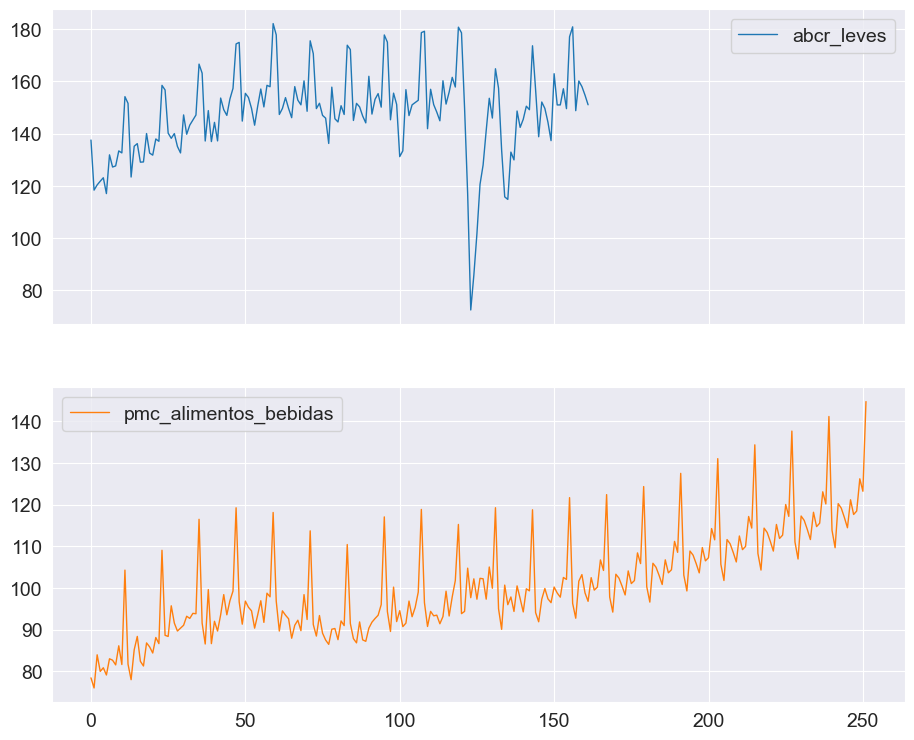

In [74]:
axes=df[["abcr_leves", "pmc_alimentos_bebidas"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

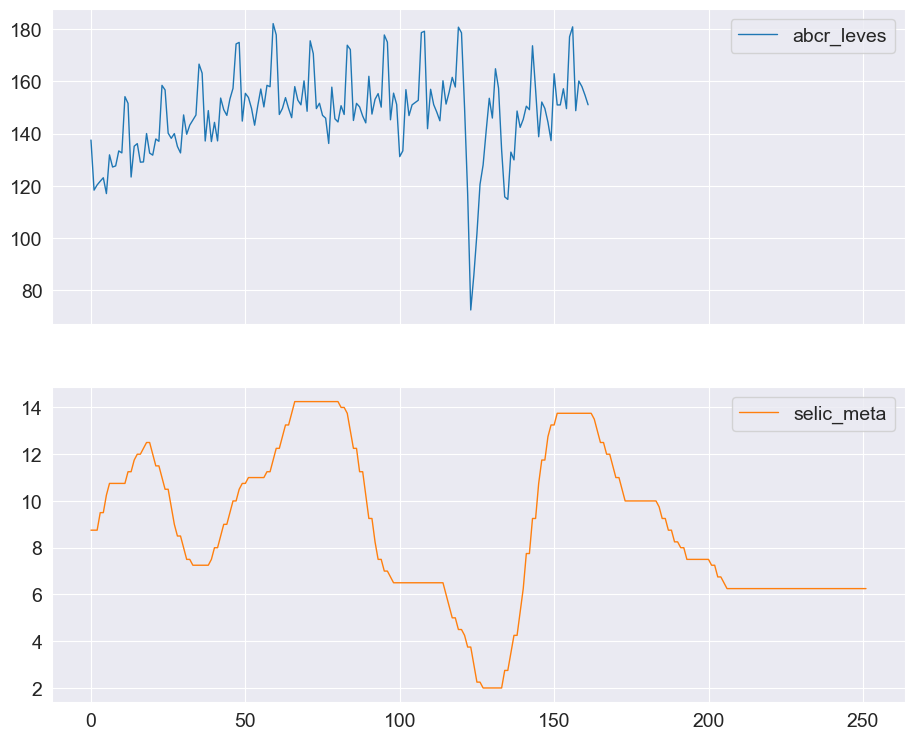

In [75]:
axes=df[["abcr_leves", "selic_meta"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

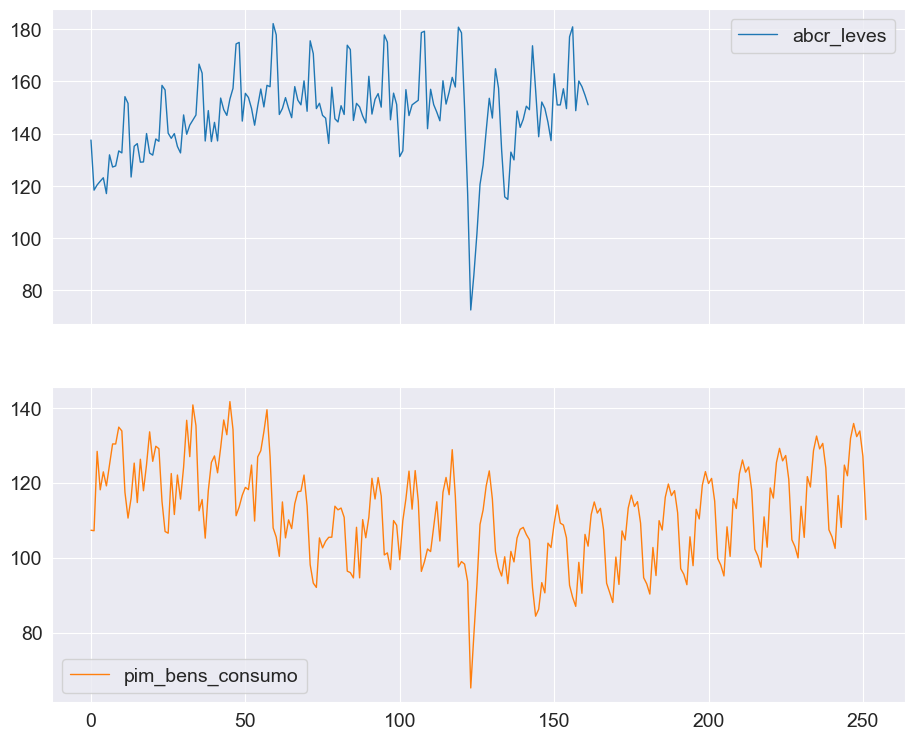

In [76]:
axes=df[["abcr_leves", "pim_bens_consumo"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

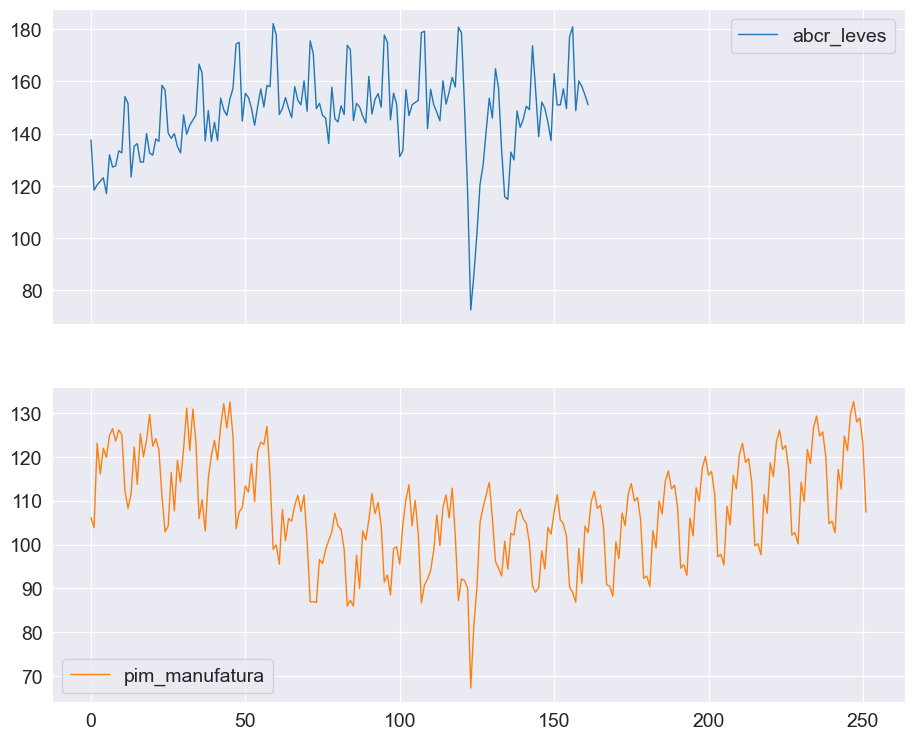

In [77]:
axes=df[["abcr_leves", "pim_manufatura"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

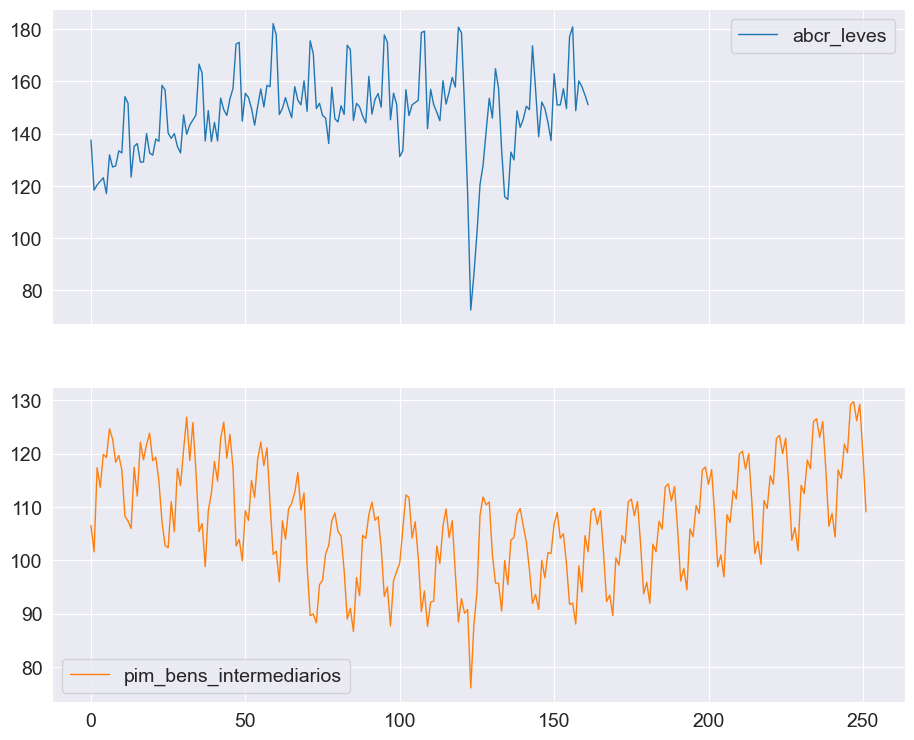

In [78]:
axes=df[["abcr_leves", "pim_bens_intermediarios"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

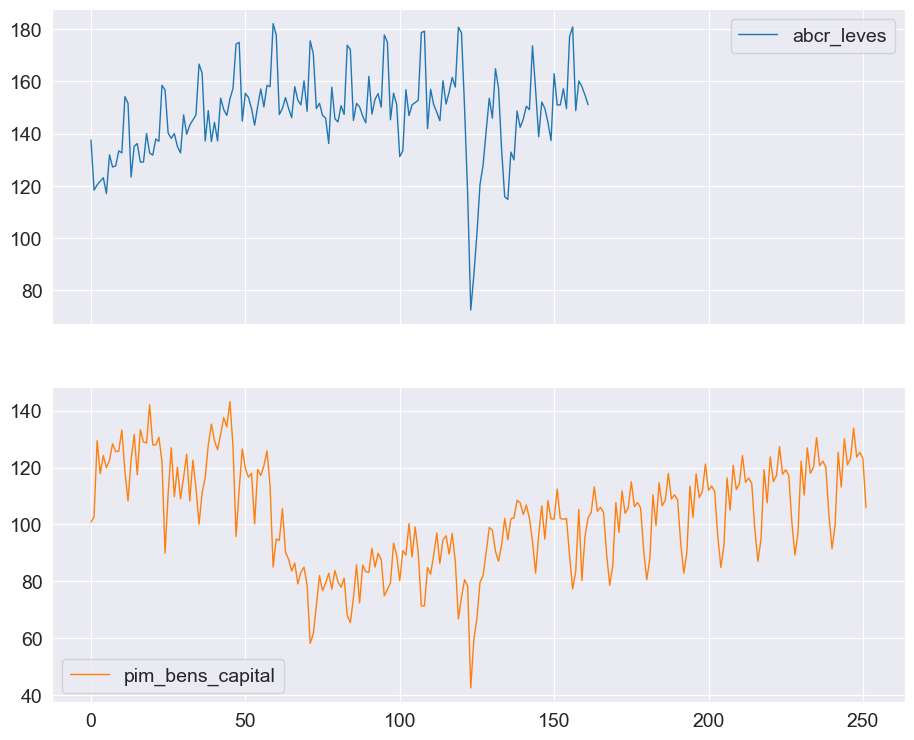

In [79]:
axes=df[["abcr_leves", "pim_bens_capital"]].plot(figsize=(11, 9), subplots=True, linewidth=1)